

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

in this project we will invistgate about three questions: 1- what year have the higher budget?? 2- in which interval the movies gain higher than budget ?? 3- there is a relation between number of vote and popularity ? 4-specify the highest profit of the first five  movies

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np 
import csv
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




### Data Cleaning 

first i will check for the useful columns and drop anything else
AND check for null values to fix it

In [3]:
df.shape

(10866, 21)

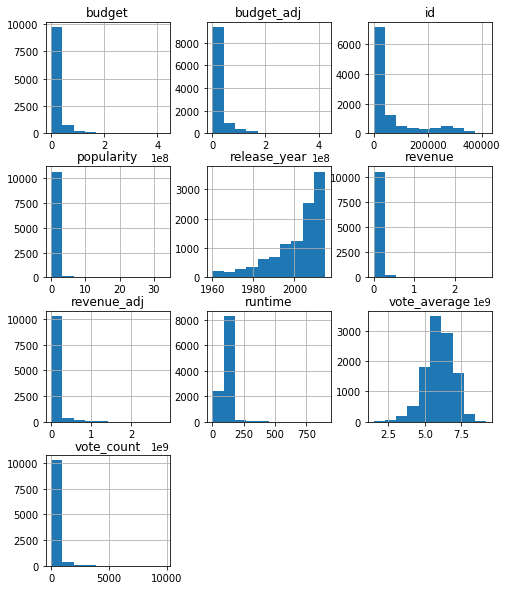

In [4]:
df.hist(figsize=(8,10));

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#drop 
df.drop(['homepage','imdb_id','tagline','keywords','overview'], axis = 1, inplace =True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [7]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


check for duplicates and null values

In [8]:
def summation():
    return sum(df.duplicated())
summation()

1

In [9]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
summation()

0

In [11]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9772 non-null   int64  
 1   popularity            9772 non-null   float64
 2   budget                9772 non-null   int64  
 3   revenue               9772 non-null   int64  
 4   original_title        9772 non-null   object 
 5   cast                  9772 non-null   object 
 6   director              9772 non-null   object 
 7   runtime               9772 non-null   int64  
 8   genres                9772 non-null   object 
 9   production_companies  9772 non-null   object 
 10  release_date          9772 non-null   object 
 11  vote_count            9772 non-null   int64  
 12  vote_average          9772 non-null   float64
 13  release_year          9772 non-null   int64  
 14  budget_adj            9772 non-null   float64
 15  revenue_adj         

# Exploratory Data Analysis 

## 1- what year have the higher budget??

In [12]:
grouping = df.groupby("release_year") 
grouping['budget'].mean().reset_index().sort_values('budget', ascending=False)


,release_year,budget
40,2000,2.926633e+07
44,2004,2.794897e+07
39,1999,2.710017e+07
41,2001,2.650485e+07
37,1997,2.639493e+07
43,2003,2.451125e+07
42,2002,2.418108e+07
38,1998,2.352440e+07
45,2005,2.258292e+07
50,2010,2.221868e+07


here i grouped release_year with the highest budget first 

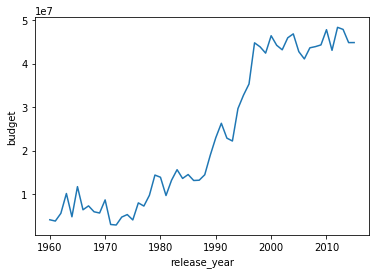

In [26]:
b= df.groupby("release_year")['budget'].mean().plot()
b.set_ylabel('budget');

As we can see, the budget is increasing yearly but in 2004 it's stars decreased again but then it start to increased again where the highest budget was in 2013

## 2- in which interval the movies gain higher than budget ?

i will clear the zero revenue 

In [27]:
def dropvalues(par):
    return df.drop(par.index, axis=0 , inplace = True)
    

In [28]:
zeroBud = df[ df['budget'] < 1 ]
dropvalues(zeroBud)

In [29]:
zeroRev= df[ df['revenue'] < 1 ]
dropvalues(zeroRev)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3805 non-null   int64  
 1   popularity            3805 non-null   float64
 2   budget                3805 non-null   int64  
 3   revenue               3805 non-null   int64  
 4   original_title        3805 non-null   object 
 5   cast                  3805 non-null   object 
 6   director              3805 non-null   object 
 7   runtime               3805 non-null   int64  
 8   genres                3805 non-null   object 
 9   production_companies  3805 non-null   object 
 10  release_date          3805 non-null   object 
 11  vote_count            3805 non-null   int64  
 12  vote_average          3805 non-null   float64
 13  release_year          3805 non-null   int64  
 14  budget_adj            3805 non-null   float64
 15  revenue_adj         

In [18]:
len(df.query("revenue <1")) , len(df.query("budget<1"))


(0, 0)

Check if the we rid all zero value 

In [19]:
gain_loss = df[['budget', 'revenue','release_year']] 
gain_loss.head()

,budget,revenue,release_year
0,150000000,1513528810,2015
1,150000000,378436354,2015
2,110000000,295238201,2015
3,200000000,2068178225,2015
4,190000000,1506249360,2015


In [20]:
(gain_loss.query("revenue >budget"))

,budget,revenue,release_year
0,150000000,1513528810,2015
1,150000000,378436354,2015
2,110000000,295238201,2015
3,200000000,2068178225,2015
4,190000000,1506249360,2015
...,...,...,...
10822,7500000,33736689,1966
10828,3000000,13000000,1966
10829,4653000,6000000,1966
10835,12000000,20000000,1966


number of movies get revenue higher than budget 2756 

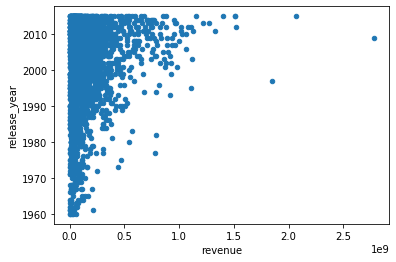

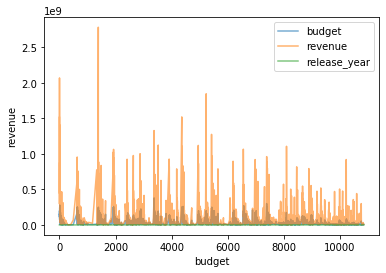

In [36]:
a =(gain_loss.query("revenue >budget"))

a.plot(x='revenue',y='release_year',kind='scatter')
fig=a.plot(alpha=0.6);#to make budge clearly
fig.set_xlabel('budget')
fig.set_ylabel('revenue');

as we can see there is some movies has revenue higher than budget from 2000 to 2010 there was the most high revenue 

## 3- there is a relation between number of vote and popularity ? 

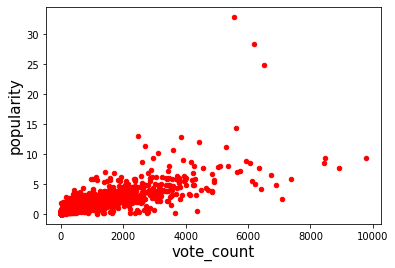

In [22]:
p = df.plot(x='vote_count', y='popularity', kind='scatter', color='red' );

p.set_xlabel('vote_count',size=15)
p.set_ylabel('popularity',size=15);

as we can see there is a positive relation between them 

## 4-specify the highest profit of the first five  movies

In [23]:
profit = df.revenue - df.budget # here i calculate profit 
df['profit']= profit # then i make i new columns for profit 
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810


In [24]:
highest_profit = df.nlargest(5,columns='profit')[['id','original_title','profit']]
highest_profit

,id,original_title,profit
1386,19995,Avatar,2544505847
3,140607,Star Wars: The Force Awakens,1868178225
5231,597,Titanic,1645034188
0,135397,Jurassic World,1363528810
4,168259,Furious 7,1316249360


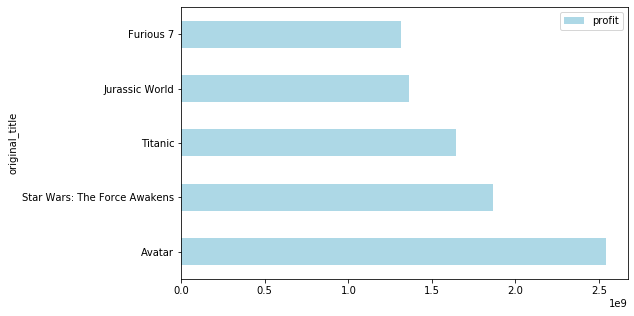

In [25]:
highest_profit.plot(x='original_title',y='profit' , kind = 'barh',figsize=(8,5) , color='lightblue')
p.set_xlabel('Profit');

as we can see the highest profit was avatar movie

# Conclusion 

In the fisrt, we can see the budget of the movies was increasing yearly until 2004 it was decreasing i think that's beacause we don't have that much of dateset in 2004 like 2010-2015 (which they has the highest budget) 

Secondly, we can see as much as the movie popular they get more voting 

finally,there is alot of missing values of budget and revenue that effect my study.